# Stage 04: Machine Learning Model

This file contain an analysis correlation of variables of the processed data and a Machine Learning model for predict the total fare amount of a trip. The steps are:
1. Importinglibraries
2. Loading the data
3. Preparing the data
4. Analysis
5. Machine Learning Model

### Step 1: Importing libraries

In [3]:
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

### Step 2: Loading the data


In [ ]:
df = pd.read_csv ('taxi_clean.csv')

### Step 3: Preparing the data

a) We drop fields that don't have weather data

In [ ]:
df_unknown = df[df.snow.isna()].copy()

In [ ]:
df.drop(list(df[df.snow.isna()].index.values),axis=0,inplace=True)

b) Using infer_objects, we adjust the data types for each column

In [6]:
df = df.infer_objects()

c) Start the preliminary analysis: we make a matrix correlation

In [ ]:
df_estudio = df.drop(columns=['vendor_id', 'pu_time', 'do_time', 'store_and_fwd_flag', 'pu_zone_id', 'do_zone_id',
       'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount',
       'fare_per_mile', 'fare_per_minute',
       'id_time_borough', 'outlier'])

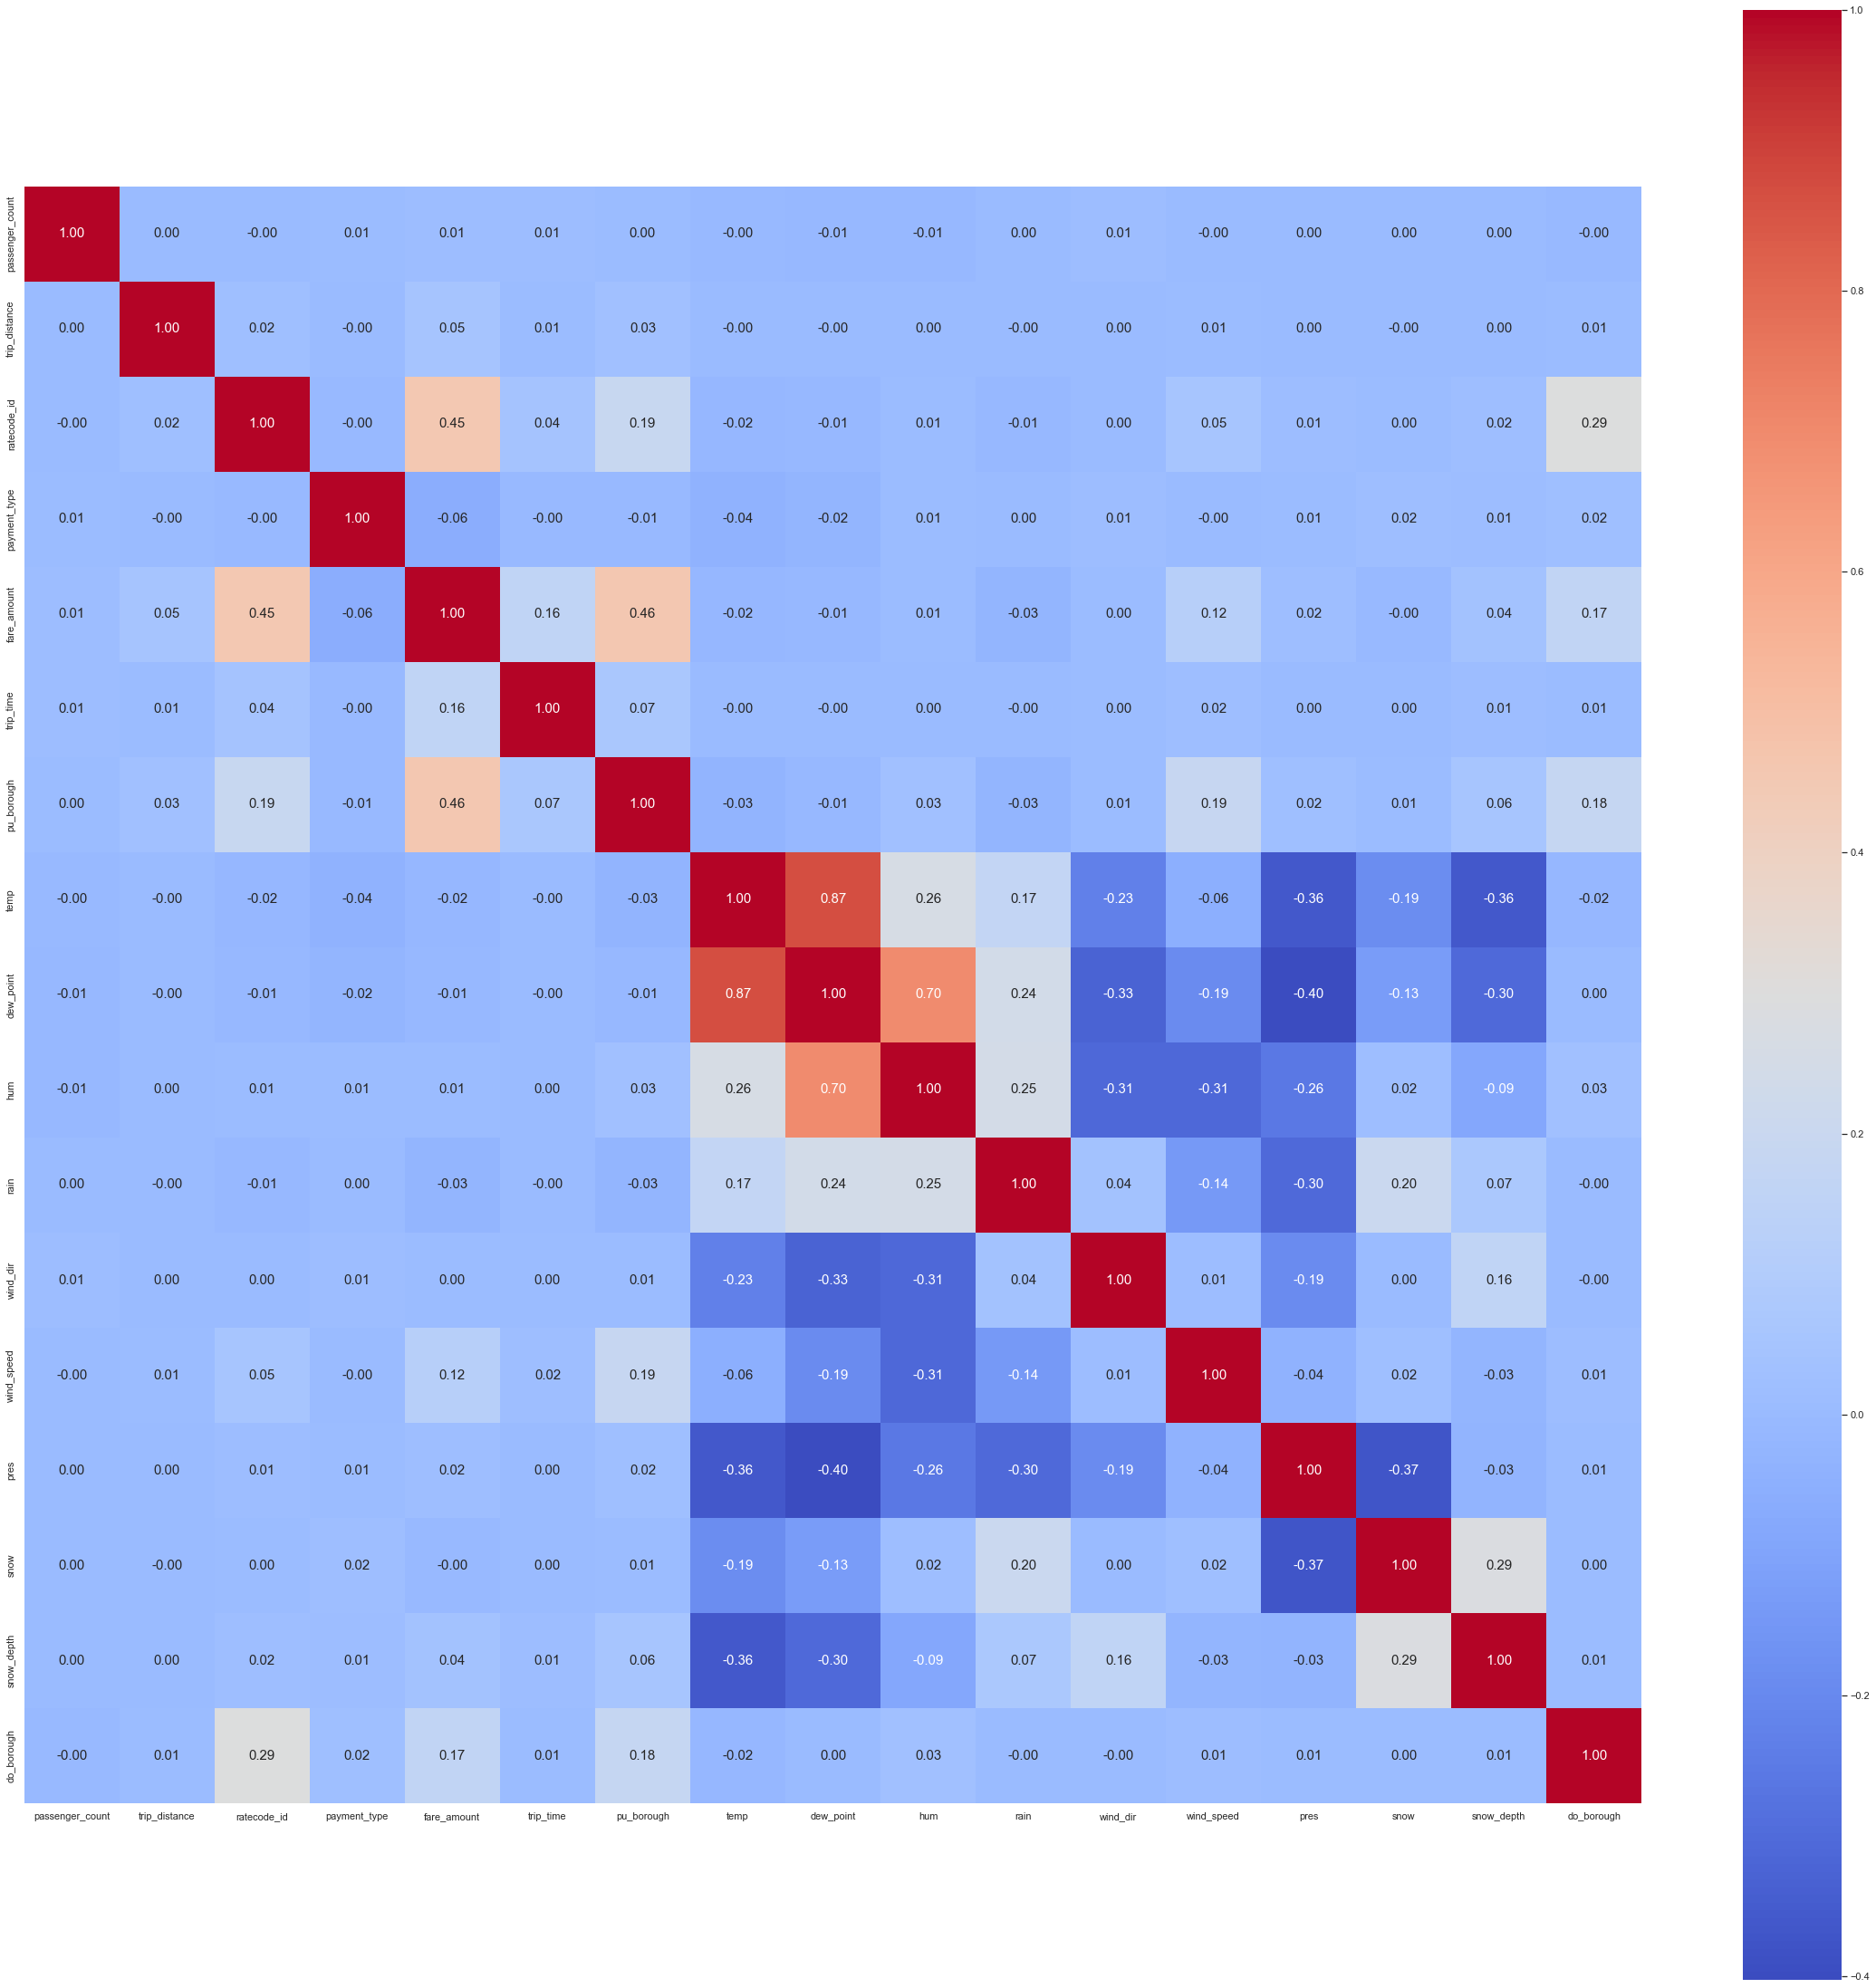

In [ ]:
corr = df_estudio.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_estudio.columns, 
           yticklabels= df_estudio.columns,
           cmap= 'coolwarm')
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
plt.show()

Seeing this matrix, the features that have a high correlation with fare_amount are: pu_borough, ratecode_id, do_borough and trip_time. We analyze these variable more deep. On the other side, the weather features don't have any relationship with the fare of trips, so we discard these columns.

De acuerdo a esta primera matriz, las principales variables que influyen en fare_amount son: pu_borough, ratecode_id, y en menor grado, do_borough y trip_time. Analizamos estas variables más a profundidad. Por otro lado, las variables climáticas no parecen guardar ninguna relación con la tarifa de los viajes, así que descartaremos estas columnas

In [ ]:
df = pd.concat([df,df_unknown])

In [ ]:
df.drop(columns = ['temp', 'dew_point', 'hum', 'rain','wind_dir', 'wind_speed', 'pres', 'snow', 'snow_depth'],inplace=True)

In [ ]:
df_estudio = df.drop(columns=['vendor_id', 'pu_time', 'do_time', 'store_and_fwd_flag', 'pu_zone_id', 'do_zone_id',
       'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount',
       'fare_per_mile', 'fare_per_minute',
       'id_time_borough', 'outlier'])

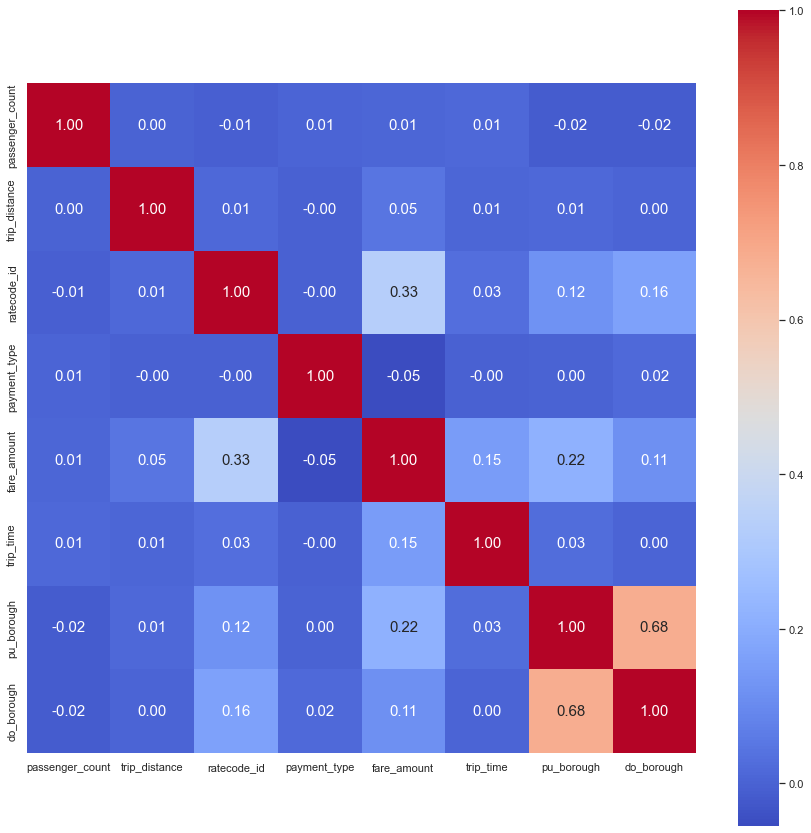

In [ ]:
corr = df_estudio.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_estudio.columns, 
           yticklabels= df_estudio.columns,
           cmap= 'coolwarm')
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
plt.show()

d) ratecode_id

First, a column with the description of each ratecode_id was created to make it easier to read the graphs

In [ ]:
dicc_ratecode = {1:"Standard", 2:"JFK", 3:"EWR", 4:"Nass/West", 5:"Negotiated", 6:"Group Ride", 99:"Unknown"}
df['ratecode'] = df.ratecode_id.map(dicc_ratecode)

Plotting

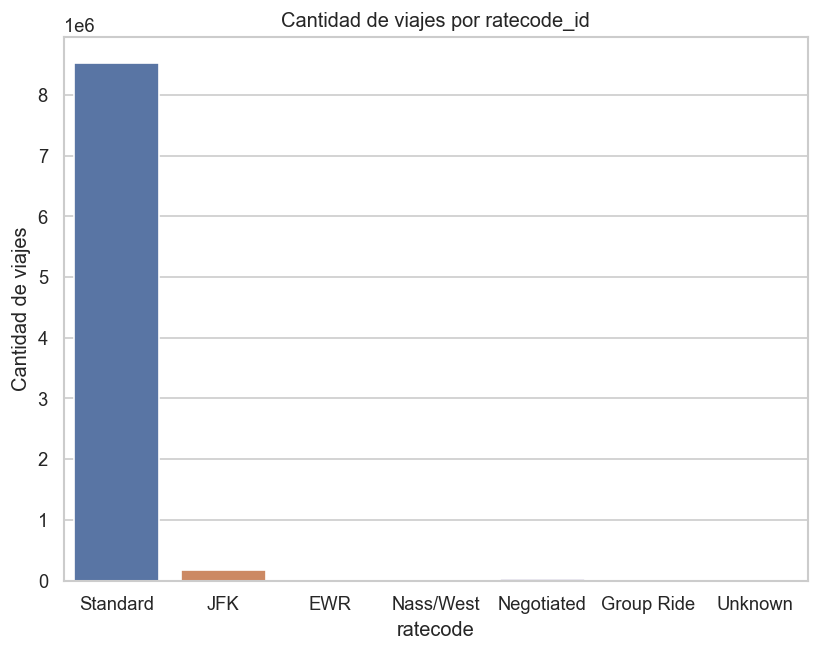

In [ ]:
p1 = df.groupby('ratecode')['fare_amount'].count()
p1 = p1.reindex(["Standard", "JFK", "EWR", "Nass/West", "Negotiated", "Group Ride", "Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('ratecode')
plt.ylabel('amount of trips')
plt.title('amount of trips for each ratecode_id')
plt.show()

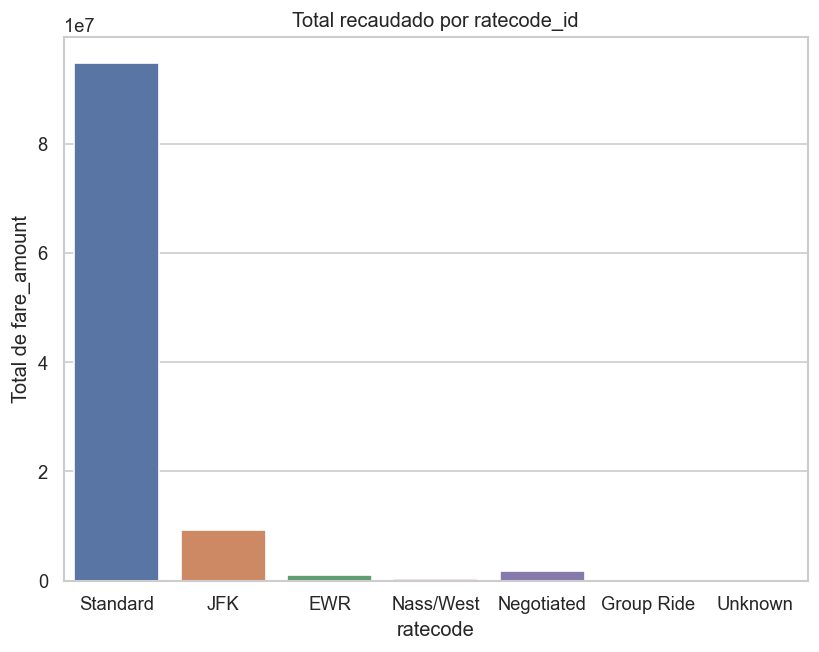

In [ ]:
p1 = df.groupby('ratecode')['fare_amount'].sum()
p1 = p1.reindex(["Standard", "JFK", "EWR", "Nass/West", "Negotiated", "Group Ride", "Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('ratecode')
plt.ylabel('Fare total of fare_amount')
plt.title('ratecode_id - totals')
plt.show()

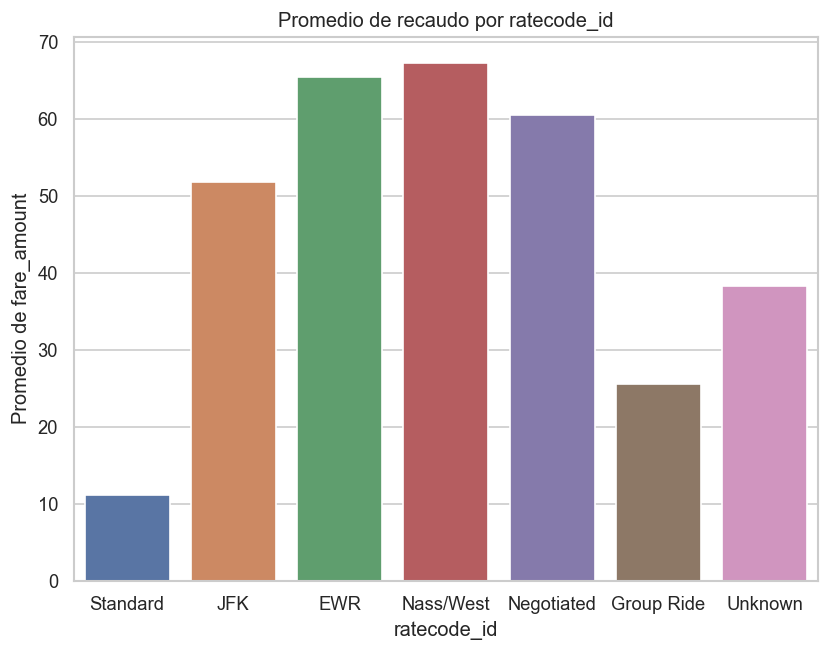

In [ ]:
p1 = df.groupby('ratecode')['fare_amount'].mean()
p1 = p1.reindex(["Standard", "JFK", "EWR", "Nass/West", "Negotiated", "Group Ride", "Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('ratecode_id')
plt.ylabel('Average of fare_amount')
plt.title('ratecode_id - averages')
plt.show()

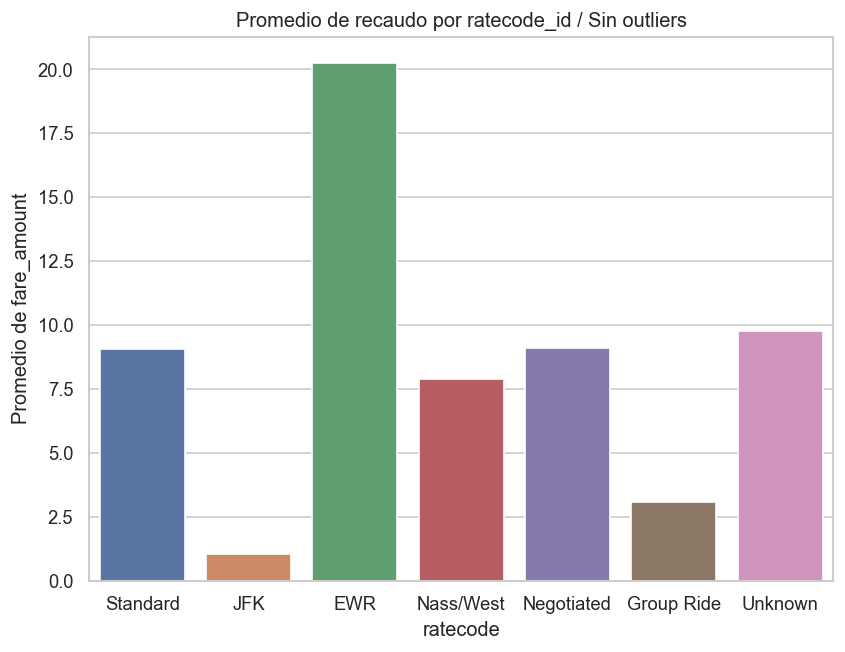

In [ ]:
p1 = df[df.outlier == 1].groupby('ratecode')['fare_amount'].mean()
p1 = p1.reindex(["Standard", "JFK", "EWR", "Nass/West", "Negotiated", "Group Ride", "Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('ratecode')
plt.ylabel('fare_amount average')
plt.title('ratecode_id - averages / Without outliers')
plt.show()

e) pu_borough

First, we create a column with the pu_borough description to make it easier to read the graph

In [ ]:
dicc_borough = {0:"Bronx", 1:"Brooklyn",2:"Manhattan",3:"Queens",4:"Staten Island",5:"EWR",6:"Unknown"}
df['borough'] = df.pu_borough.map(dicc_borough)

Y se procedió a graficar

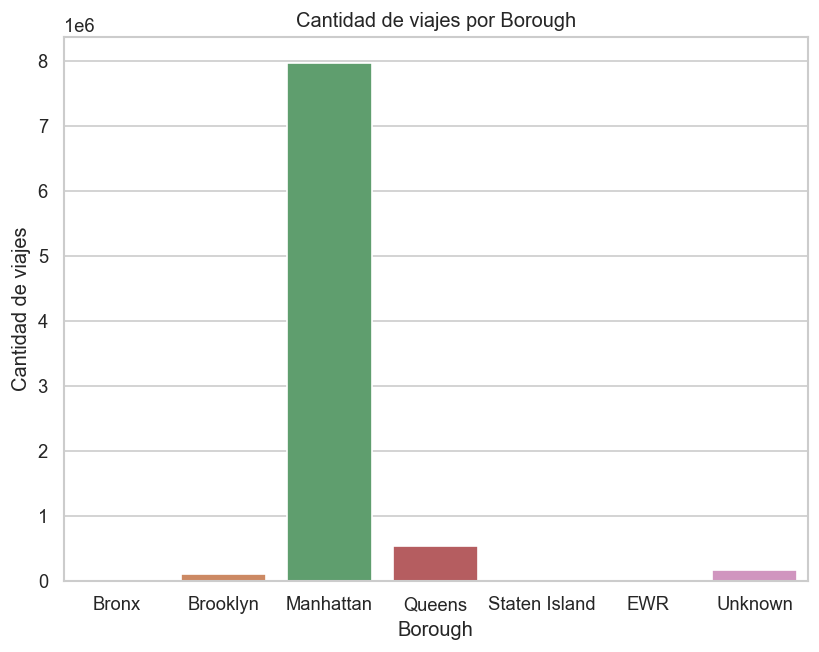

In [ ]:
p1 = df.groupby('borough')['fare_amount'].count()
p1 = p1.reindex(["Bronx", "Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('Borough')
plt.ylabel('Amount of trips')
plt.title('Amount of trips for each borough')
plt.show()

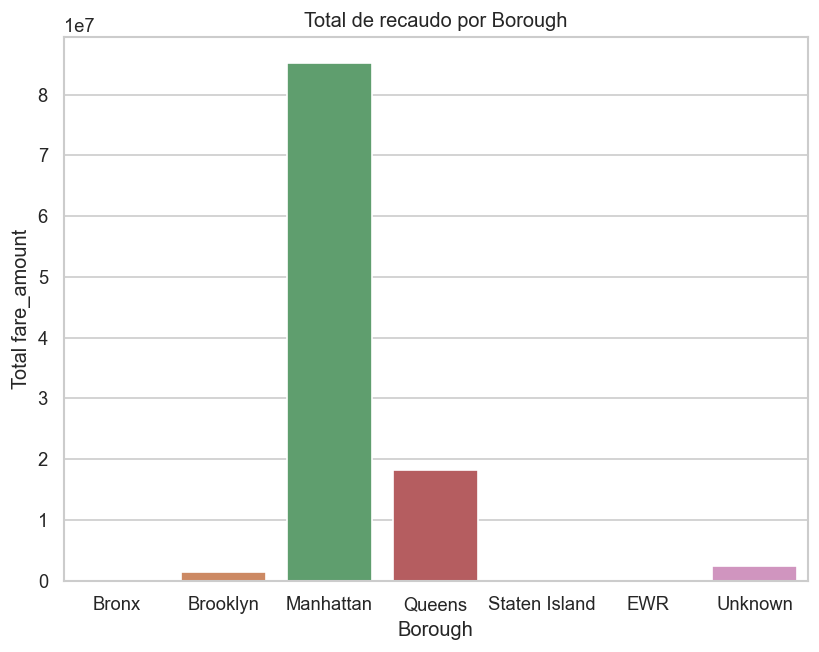

In [ ]:
p1 = df.groupby('borough')['fare_amount'].sum()
p1 = p1.reindex(["Bronx", "Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('Borough')
plt.ylabel('Total fare_amount')
plt.title('Total fare amount for each borough')
plt.show()

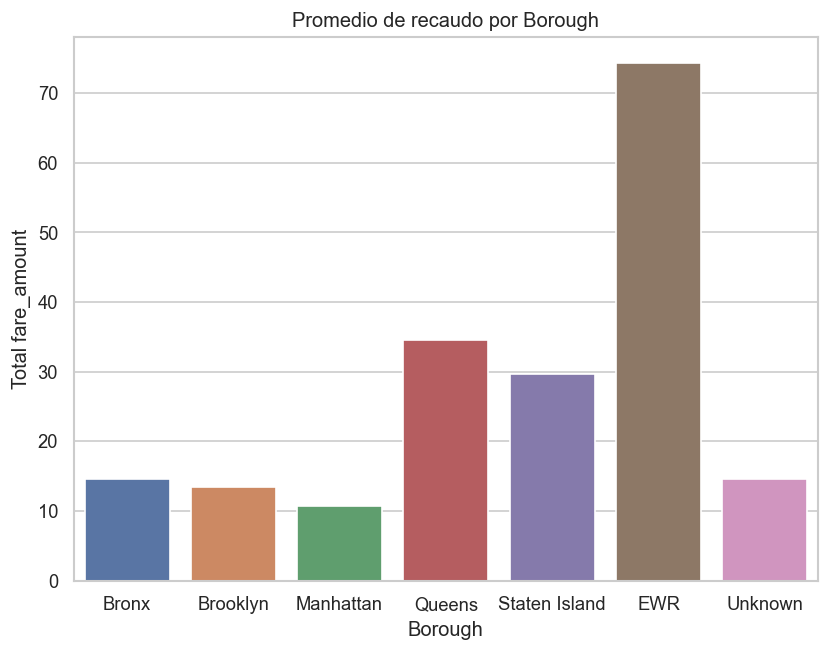

In [ ]:
p1 = df.groupby('borough')['fare_amount'].mean()
p1 = p1.reindex(["Bronx", "Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('Borough')
plt.ylabel('Total fare_amount')
plt.title('Fare amount average for each borough')
plt.show()

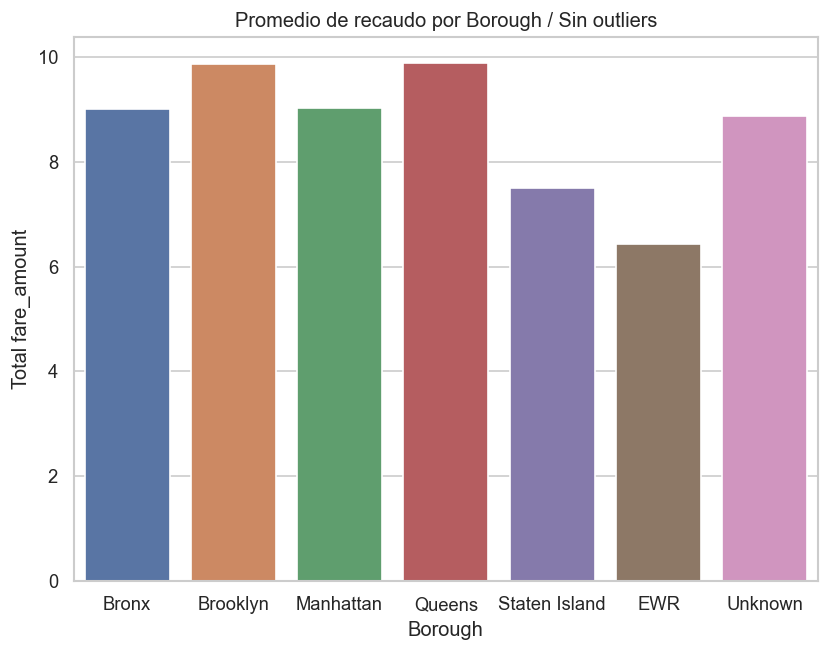

In [ ]:
p1 = df[df.outlier == 1].groupby('borough')['fare_amount'].mean()
p1 = p1.reindex(["Bronx", "Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"])
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.barplot(x = p1.index, y = p1.values)
plt.xlabel('Borough')
plt.ylabel('Total fare_amount')
plt.title('Fare amount average for each borough / Without outliers')
plt.show()

f) trip_time

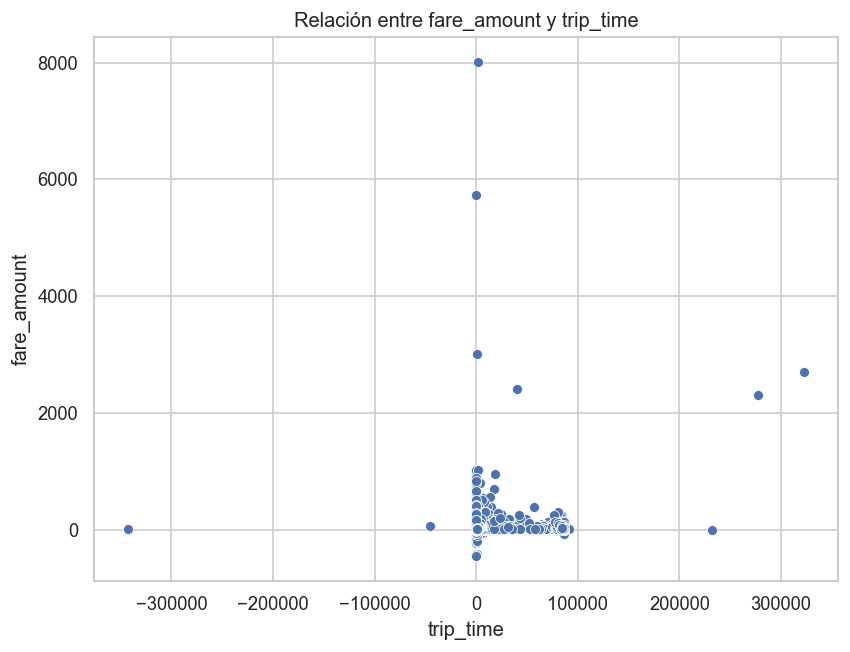

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_time',y = 'fare_amount', data=df)
plt.title('Relationship between fare_amount and trip_time')
plt.show()

C:\Users\urbda\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


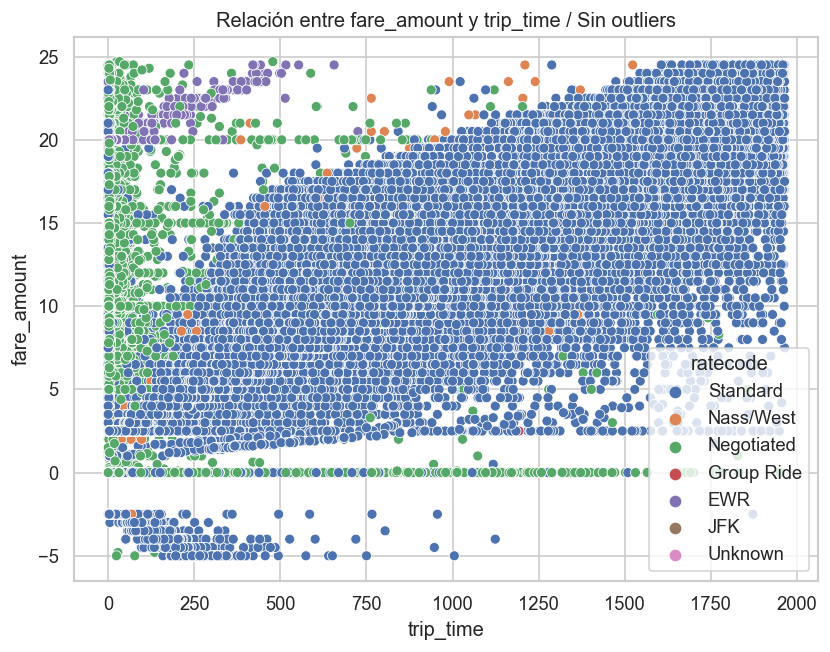

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.scatterplot(x = 'trip_time',y = 'fare_amount', data=df[df.outlier == 1],hue='ratecode')
plt.title('relationship between fare_amount and trip_time / without outliers')
plt.show()

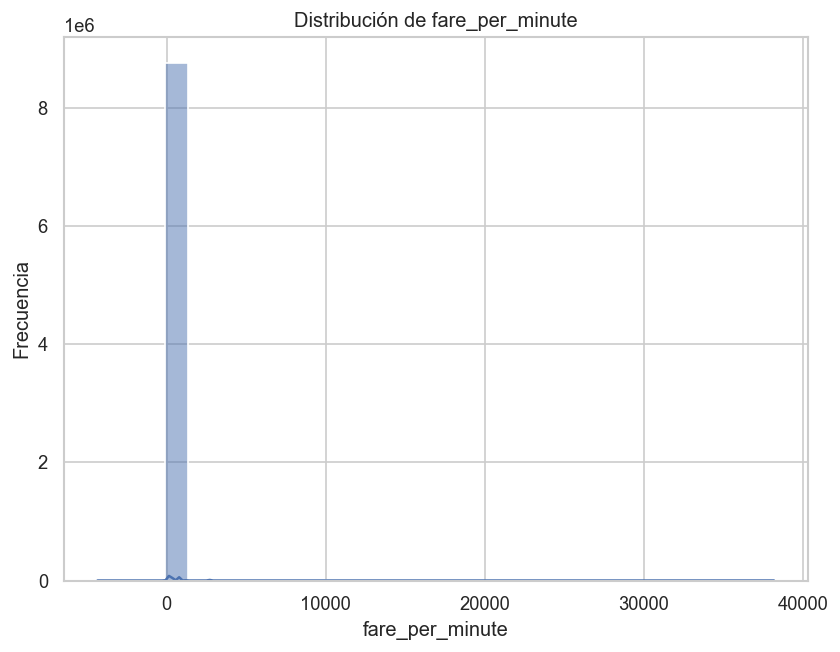

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_per_minute',data=df,bins=30,kde=True)
plt.ylabel('Frecuency')
plt.title('fare_per_minute distribution')
plt.show()

In [ ]:
# Calculamos rango intercuartílico, mínimo, y máximo
IQR = df.trip_time.quantile(.75) - df.trip_time.quantile(.25)
min = df.trip_time.quantile(.25) - (1.5 * IQR)
max = df.trip_time.quantile(.75) + (1.5 * IQR)

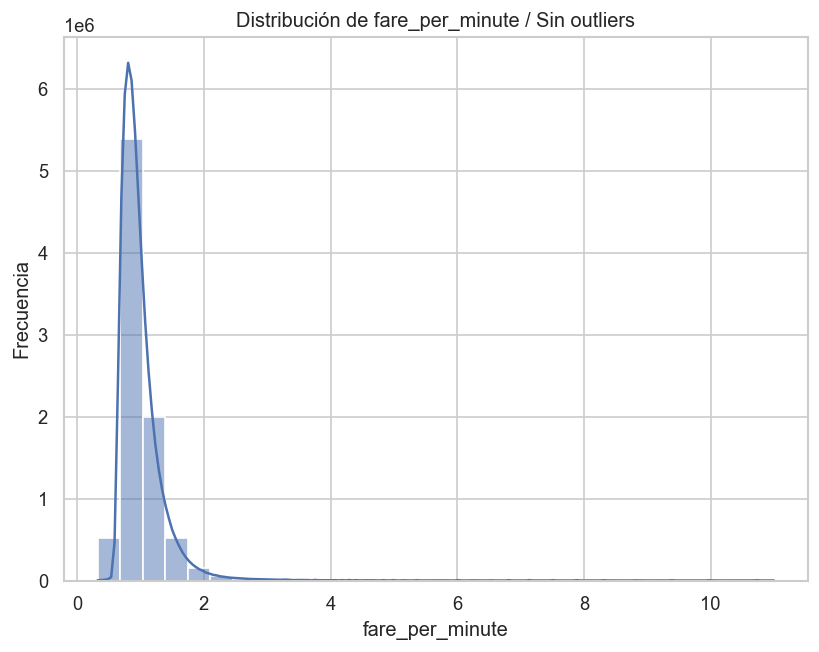

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
splot = sns.histplot(x = 'fare_per_minute',data=df[((df.fare_per_minute >= min))&(df.fare_per_minute <= max)],bins=30,kde=True)
plt.ylabel('Frecuency')
plt.title('fare_per_minute distribution / Without outliers')
plt.show()

### Step 5: Machine Learning Model, first aproximation

For simplicity, we choose to start with a linear regression machine learning model

a) Encoding

In [ ]:
dicc_storefwd = {'N':0,'Y':1}
df.store_and_fwd_flag = df.store_and_fwd_flag.map(dicc_storefwd)

b) Importing libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

c) Split dataset into train dataset and test dataset

In [ ]:
X1 = df[['passenger_count','trip_distance','ratecode_id','store_and_fwd_flag',
        'payment_type','trip_time', 'pu_borough','do_borough']]
y1 = df['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008280, 8)
(1752071, 8)
(7008280,)
(1752071,)


d) Training the model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[-1.03148125e-02  2.59896459e+00  3.23411567e+00 -2.28006272e-02
 -3.17080213e-01  7.78216902e-05 -9.90280607e-03  6.24851049e-01]
0.7368211962991804
8


e) Predicting results and calculating the error

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('train dataset error:', mean_squared_error(y_train, y_train_pred))
print('test dataset error:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 28.43312618711266
Error en datos de test: 138485.5918968032


f) Now, we repeat the process but without outliers

In [ ]:
X2 = df[df.outlier == 1][['passenger_count','trip_distance','ratecode_id','store_and_fwd_flag',
                        'payment_type','trip_time', 'pu_borough','do_borough']]
y2 = df[df.outlier == 1]['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6151464, 8)
(1537867, 8)
(6151464,)
(1537867,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[-0.00804764  1.61591318  0.40730485  0.09552154 -0.02133999  0.00654368
 -0.03337444  0.07012115]
1.7158111123592938
8


In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('train dataset error:', mean_squared_error(y_train, y_train_pred))
print('test dataset error:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.3233365119765902
Error en datos de test: 0.3249780045652018
